<a href="https://colab.research.google.com/github/miguelsmachado/data_science/blob/master/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, vamos iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Lembre-se de realizar o *split* dos conjuntos, para evitar o vazamento de dados.

Vamos à Análise Exploratória.

## Análise Exploratória

### Verificando as 5 primeiras entradas

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Verificando o resumo estátistico 

In [ ]:
df.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


### Verificando os valores ausentes

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Como podemos ver, não há dados ausentes.

### Verificando o balanceamento do DataSet

In [ ]:
balanceamento = df.Class.value_counts()

balanceamento

0    284315
1       492
Name: Class, dtype: int64

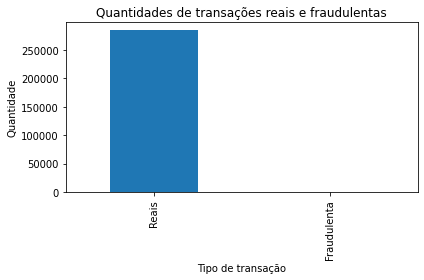

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

balanceamento.plot(kind="bar", ax=ax)
ax.set_title("Quantidades de transações reais e fraudulentas")
ax.set_ylabel("Quantidade")
ax.set_xlabel("Tipo de transação")
ax.set_xticklabels(labels=['Reais', 'Fraudulenta'])

plt.tight_layout();

In [ ]:
df.Class.value_counts()/df.shape[0]

0    0.998273
1    0.001727
Name: Class, dtype: float64

Como podemos ver, os dados estão completamente balanceados.

Temos menos de 1% de transações fraudulentas.

Tal situação poderá comprometer nosso modelo de aprendizado, com isso, será necessário fazer um rebalanceamento dos resultados.

### Distribuição das ocorrências em relação ao tempo 


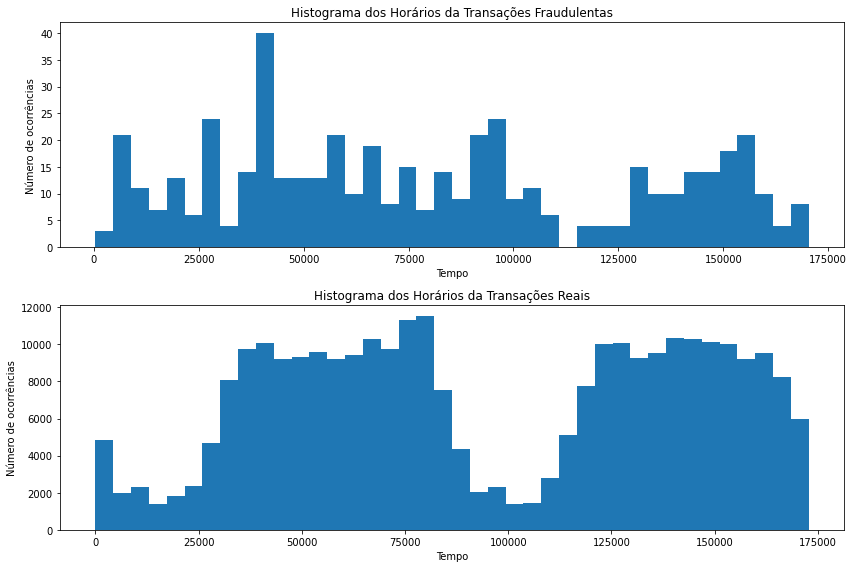

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))

df[df.Class == 1].Time.plot(kind='hist', bins=40, ax=ax[0])
ax[0].set_title("Histograma dos Horários da Transações Fraudulentas")
ax[0].set_ylabel("Número de ocorrências")
ax[0].set_xlabel("Tempo")

df[df.Class == 0].Time.plot(kind='hist', bins=40, ax=ax[1])
ax[1].set_title("Histograma dos Horários da Transações Reais")
ax[1].set_ylabel("Número de ocorrências")
ax[1].set_xlabel("Tempo")

plt.tight_layout()

### Distribuição das ocorrências em relação ao valor 


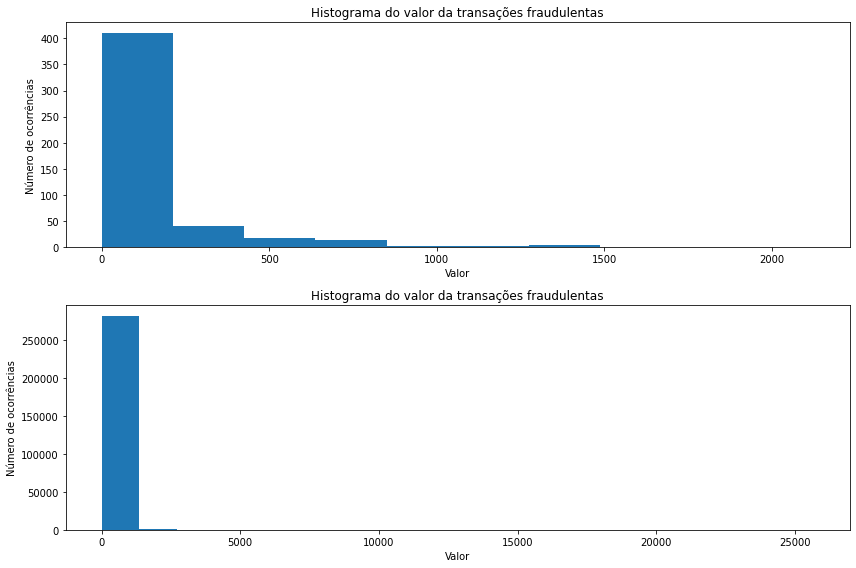

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))

df[df.Class == 1].Amount.plot(kind='hist', bins=10, ax=ax[0])
ax[0].set_title("Histograma do valor da transações fraudulentas")
ax[0].set_ylabel("Número de ocorrências")
ax[0].set_xlabel("Valor")

df[df.Class == 0].Amount.plot(kind='hist', bins=19, ax=ax[1])
ax[1].set_title("Histograma do valor da transações fraudulentas")
ax[1].set_ylabel("Número de ocorrências")
ax[1].set_xlabel("Valor")

plt.tight_layout();

#### Verificando em um boxplot

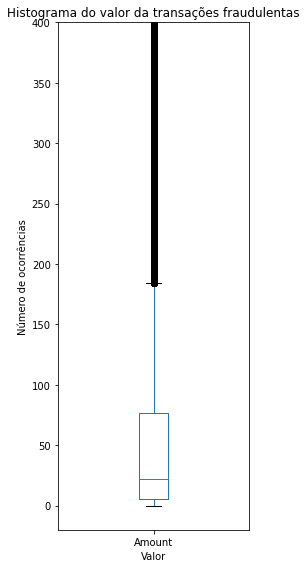

In [ ]:
fig, ax = plt.subplots(figsize=(4,8))

ax = df[df.Class == 0].Amount.plot(kind='box')
ax.set_title("Histograma do valor da transações fraudulentas")
ax.set_ylabel("Número de ocorrências")
ax.set_xlabel("Valor")
plt.ylim((-20, 400))

plt.tight_layout()

### Verificando em um heatmap

In [ ]:
corr = df.corr()

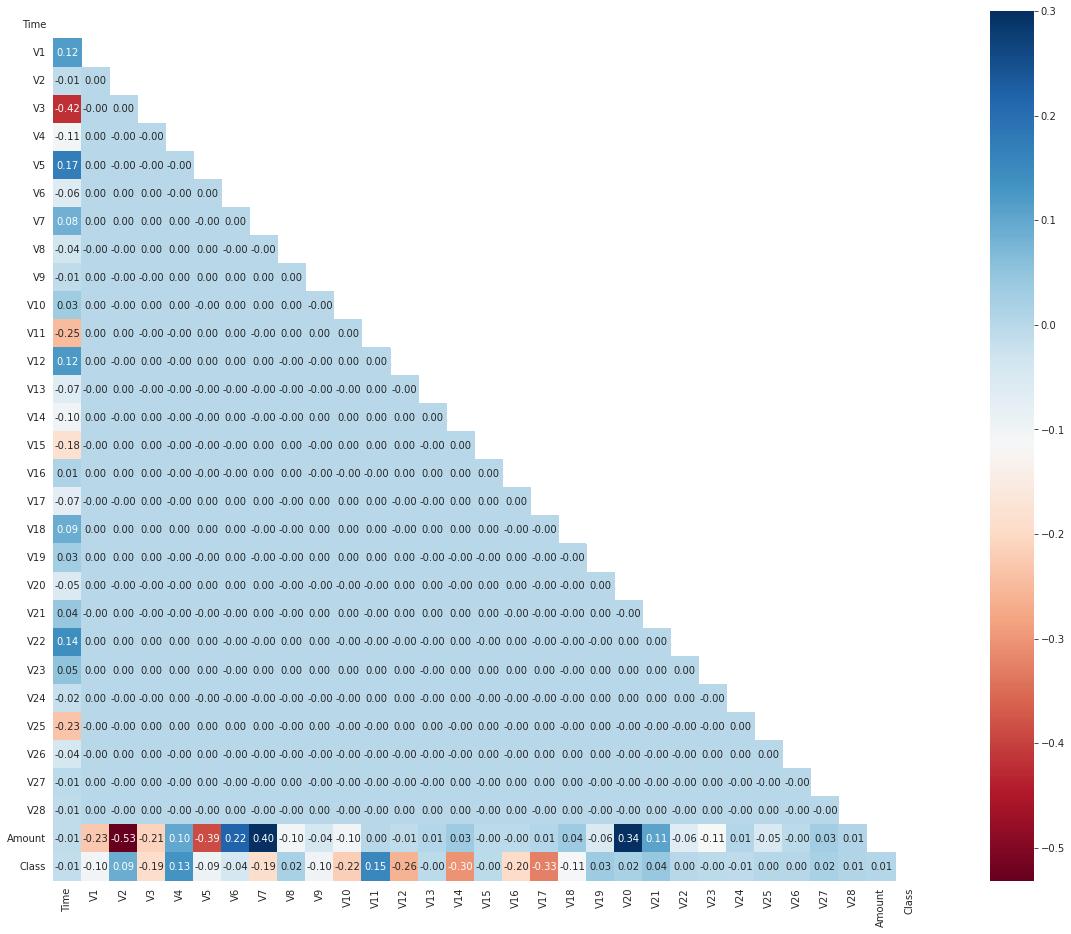

In [ ]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     f, ax = plt.subplots(figsize=(24, 16))
     ax = sns.heatmap(corr, mask=mask, vmax=.3, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

Apesar de não conhecermos os dados, por eles terem passados pelo processe de PCA, podemos que possuem poucas correlação com o tipo de transação.

## Preparação dos Dados

Inicialmente vamos normalizar os dados que ainda não foram pré processados, no caso Time e Amount.
Vale lembrar que as outras variáveis passaram pelo processo de redução de dimensionalidade chamado de PCA.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### Dividindo em dados de treino e teste

Vamos separar nossos dados para que possamos criar nosso modelo de ML

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Class", axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

Vamos conferir se os dados foram tirados de forma estratificada.

In [ ]:
y_train.value_counts() / y_train.shape[0]

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [ ]:
y_test.value_counts() / y_test.shape[0]

0    0.998273
1    0.001727
Name: Class, dtype: float64

Como podemos ver, as proporções estão iguais!

### Balanceamento dos dados

Agora vamos ter que trabalhar um outro problema, nossos dados estão extremamente desbalanceados. Precisamos reequilibrar os valor em `y`, afinal da forma que iremos trabalhar, nosso modelo de ML irá travar pouco contato com valores 1.

Temos 2 opções. Podemos reduzir os maiores valores para equiparar com os em menor quantidade (Under Sampling) ou aumentar os em menor quantidade para equiparar (Over Sampling)

Para nosso exemplo, vamos usar a técnica de Under Sampling

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


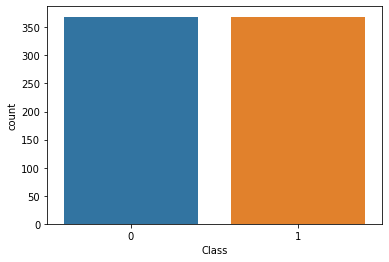

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# usar técnica under-sampling
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_train, y_train)
 
# plotar a nova distribuição de classes
sns.countplot(y_res);

Como podemos ver, agora temos a mesma quantidade de amostras.

> Veja que o rebalanceamento foi aplicado somente nos dados de treino. É importante deixar os dados de teste intocáveis!



## Modelo de Machine Learning

Vamos construir alguns modelos para poder realizar posteriores comparações:

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=4, criterion="entropy")

model_tree.fit(X_res, y_res)

y_pred_tree = model_tree.predict(X_test)

### Randon Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(max_depth=4, criterion="entropy")

model_forest.fit(X_res, y_res)

y_pred_forest = model_forest.predict(X_test)

### Regressão Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()

model_logistic.fit(X_res, y_res)

y_pred_logistic = model_logistic.predict(X_test)

### SVM

In [ ]:
from sklearn.svm import SVC

model_SVC = SVC()

model_SVC.fit(X_res, y_res)

y_pred_SVC = model_SVC.predict(X_test)

## Avaliar o desempenho do modelo

Para nosso caso, a melhor métrica que temos é o RECALL, pois queremos diminuir o número de falsos negativos.

Em outras palavras, é melhor que o nosso modelo encontre um resultado que não é fraude e julgue como fraude, do que um resultado que é uma fraude e ele deixe passar.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     71079
           1       0.03      0.88      0.05       123

    accuracy                           0.95     71202
   macro avg       0.51      0.91      0.51     71202
weighted avg       1.00      0.95      0.97     71202



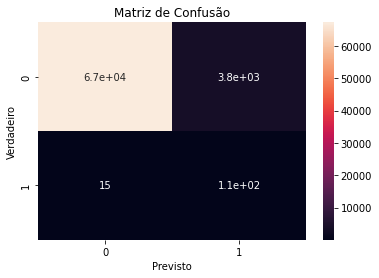

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

In [ ]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.12      0.85      0.20       123

    accuracy                           0.99     71202
   macro avg       0.56      0.92      0.60     71202
weighted avg       1.00      0.99      0.99     71202



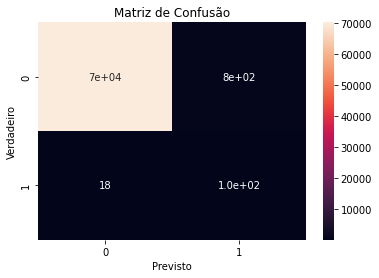

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_forest), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

In [ ]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71079
           1       0.04      0.93      0.07       123

    accuracy                           0.96     71202
   macro avg       0.52      0.94      0.52     71202
weighted avg       1.00      0.96      0.98     71202



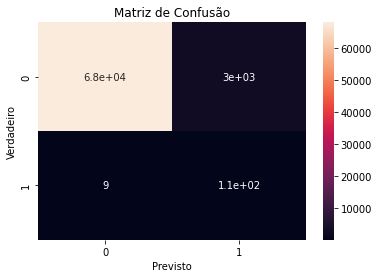

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

In [ ]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.08      0.86      0.15       123

    accuracy                           0.98     71202
   macro avg       0.54      0.92      0.57     71202
weighted avg       1.00      0.98      0.99     71202



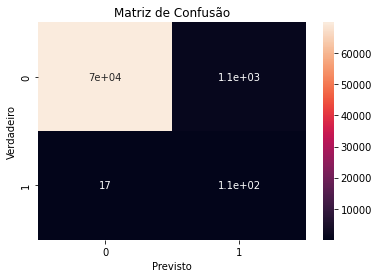

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_SVC), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

## Conclusão

O exemplo acima nos mostra diversoso conceitos importantes em apenas um problema. Trabalhamos o PCA, Balanceamento dos dados, diversos modelos de classificação e também diferentes formas de interpretarmos os resultados.

Em nosso caso, como a métrica que faz mais sentido para nós é o Recall, o modelo que mais atendeu nossas necessidades foi a Regressão Logística. Com isso também vimos que é importante saber o que estamos procurando, afinal, quem não sabe onde quer chegar, normalmente chego no lugar errado!

E além de tudo isso, vimos como são poderosas as ferramentas de Machine Learning para resolver diversos problemas que enfrentamos em nosso dia dia nos empreendimentos e até mesmo na vida pessoal.